In [1]:
#Importing Modules and Packages
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

In [ ]:
files.upload()

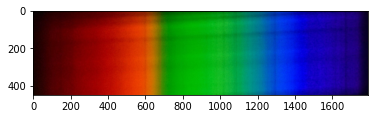

In [2]:
# Loading image
img = plt.imread('fraunhofer.JPG')
plt.imshow(img)

In [3]:
# Separating into different channels
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

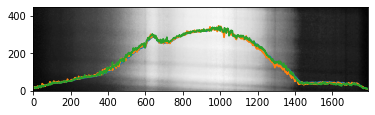

In [4]:
# Converting to greyscale
grey = 0.2126*r + 0.7152*g + 0.0722*b
grey_av = np.mean(grey, axis = 0)

plt.imshow(grey, cmap = 'Greys_r', origin = 'lower') # Greys_r -> Reverse greyscale; origin -> changing the position of 0 on the y-axis

# Plotting the intensities using two pixels from the x-axis
plt.plot(2.5*grey_av)
plt.plot(2.5*grey[110])
plt.plot(2.5*grey[100])

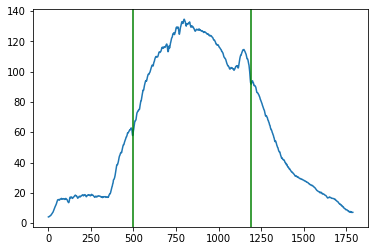

In [5]:
# Plotting the average curve
plt.plot(grey_av[::-1]) # Reversed because typically the spectrum is from blue to red but grey_av is red to blue
plt.axvline(x = 495, color = 'green')
plt.axvline(x = 1190, color = 'green')

In [6]:
wavelength = np.array([486.134,589.29])
pix = np.array([495, 1190])
K1 = (wavelength[1] - wavelength[0])/(pix[1] - pix[0])
K2 = wavelength[1] - K1*pix[1]
print(K1, K2)

0.14842589928057548 412.6631798561151


In [7]:
P = np.arange(0, len(grey_av))
pixel = P[::-1]
Lambda = K1*pixel + K2

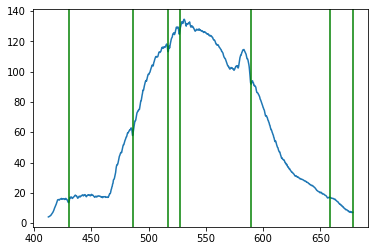

In [8]:
plt.plot(Lambda, grey_av)
plt.axvline(Lambda[0], color = 'green')
plt.axvline(Lambda[599], color = 'green')

More_Wavelengths = [486.134,517.270,527.039,759.370,430.774]

plt.axvline(More_Wavelengths[0],color='green')
plt.axvline(More_Wavelengths[1],color='green')
plt.axvline(More_Wavelengths[2],color='green')
plt.axvline(More_Wavelengths[4],color='green')
plt.axvline(658,color='green')

In [13]:
max_y = max(grey_av) 
max_x = Lambda[grey_av.argmax()] # Finding the wavelength of the peak
print('Peak Wavelength:', max_x)

Peak Wavelength: 531.1070474820143


In [16]:
# Calculating the temperature of the sun using Wien's displacement law
b = 2.89777e-3
T = b/(max_x/1e+9) # Converting to metres
print('The temperature of the sun is:', T, 'K')

The temperature of the sun is: 5456.094046837387 K
